# Example Usage of Portfolio Construction Library
___

## 1. Setup

In [3]:
import sys
print(sys.executable)

/opt/anaconda3/envs/finm/bin/python


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from portfolio_management.port_construction import *

excess_returns = pd.read_csv('data/excess_returns.csv', index_col='date', parse_dates=['date'])
excess_returns

,AAPL,JNJ,XOM,JPM,TSLA,PG,CSCO,KO,DIS,WMT,NKE,BA
date,,,,,,,,,,,,
2011-02-01,0.040822,0.027828,0.060002,0.040022,-0.008826,0.006024,-0.122571,0.016913,0.125177,-0.073057,0.079301,0.036301
2011-03-01,-0.013382,-0.026998,-0.011260,-0.012712,0.161499,-0.023073,-0.076045,0.037785,-0.014936,0.001272,-0.149800,0.032553
2011-04-01,0.004615,0.109165,0.045729,-0.010229,-0.005439,0.053538,0.025119,0.024223,0.000199,0.063663,0.091247,0.079095
2011-05-01,-0.006602,0.023856,-0.051295,-0.047272,0.091995,0.040886,-0.041129,-0.009669,-0.034140,0.004332,0.025841,-0.021969
2011-06-01,-0.034973,-0.002882,-0.019522,-0.053204,-0.033523,-0.051207,-0.070846,0.007172,-0.062227,-0.031313,0.065470,-0.047552
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-0.048090,-0.039334,0.032418,-0.071679,-0.039377,-0.010733,0.105979,-0.038324,-0.063027,0.012787,-0.083045,-0.066462
2023-09-01,-0.091864,-0.034100,0.061721,-0.013369,-0.034872,-0.059360,-0.067015,-0.068766,-0.035846,-0.017401,-0.064293,-0.148817
2023-10-01,-0.007003,-0.052010,-0.104195,-0.045531,-0.201780,0.024156,-0.034753,0.012683,0.002229,0.017326,0.073947,-0.029788


## 2. Constructing Portfolios

### 2.1 Equal-Weighted Portfolio
*Assigns an equal proportion of capital to each asset in the portfolio*

In [6]:
eq_wts = calc_equal_weights(excess_returns)
eq_wts

AAPL    0.083333
JNJ     0.083333
XOM     0.083333
JPM     0.083333
TSLA    0.083333
PG      0.083333
CSCO    0.083333
KO      0.083333
DIS     0.083333
WMT     0.083333
NKE     0.083333
BA      0.083333
Name: Weights, dtype: float64

### 2.2 Minimum Variance Portfolio
*Constructs a portfolio that minimizes overall portfolio volatility without considering asset returns*

In [7]:
mv_wts = calc_min_variance_weights(excess_returns)
mv_wts

AAPL    0.009346
JNJ     0.167465
XOM     0.059959
JPM     0.063144
TSLA    0.008613
PG      0.248501
CSCO    0.057163
KO      0.204140
DIS    -0.029532
WMT     0.195577
NKE     0.050330
BA     -0.034706
Name: Weights, dtype: float64

### 2.3 Tangency Portfolio
*Maximizes the Sharpe ratio by finding the optimal balance of risk and return*

In [8]:
tangency_wts = calc_tangency_weights(excess_returns)
tangency_wts

AAPL    0.253423
JNJ     0.198385
XOM    -0.028939
JPM     0.238696
TSLA    0.141867
PG      0.221410
CSCO   -0.116660
KO     -0.010188
DIS    -0.298954
WMT     0.172394
NKE     0.178264
BA      0.050302
Name: Weights, dtype: float64

### 2.4 Target Return Portfolio
*Optimizes for the lowest risk (variance) while ensuring the portfolio meets or exceeds a specific target return*

In [9]:
# tangency portfolio
tangency_wts = calc_tangency_weights(excess_returns)
portfolio_tangency_returns = excess_returns @ tangency_wts
portfolio_tangency_variance = portfolio_tangency_returns.var() * 12  # annualized assuming monthly data
portfolio_tangency_mean_return = portfolio_tangency_returns.mean() * 12

print(f"\nAnnualized Tangency Portfolio:")
print(f"Variance: {portfolio_tangency_variance:.4f}")
print(f"Mean Return: {portfolio_tangency_mean_return:.4f}")
print(f"Sharpe Ratio: {portfolio_tangency_mean_return/np.sqrt(portfolio_tangency_variance):.2f}")
print(f"Weights Sum: {tangency_wts.sum():.2f}")

# set target return and calculate portfolio weights
target_return = 0.15  # say we want 15% annual return (assuming monthly data)
target_ret_wts = calc_target_return_weights(excess_returns, target_return=target_return)

print('\nTarget Return Weights:')
print(target_ret_wts)

# target return portfolio
portfolio_returns = excess_returns @ target_ret_wts
portfolio_variance = portfolio_returns.var() * 12
portfolio_mean_return = portfolio_returns.mean() * 12

print(f"\nAnnualized Target Return Portfolio:")
print(f"Variance: {portfolio_variance:.4f}")
print(f"Mean Return: {portfolio_mean_return:.4f}")
print(f"Sharpe Ratio: {portfolio_mean_return/np.sqrt(portfolio_variance):.2f}")
print(f"Weights Sum: {target_ret_wts.sum():.2f}")


Annualized Tangency Portfolio:
Variance: 0.0304
Mean Return: 0.2327
Sharpe Ratio: 1.33
Weights Sum: 1.00

Target Return Weights:
AAPL    0.092698
JNJ     0.178024
XOM     0.029600
JPM     0.123095
TSLA    0.054119
PG      0.239250
CSCO   -0.002197
KO      0.130947
DIS    -0.121539
WMT     0.187660
NKE     0.094019
BA     -0.005676
Name: Weights, dtype: float64

Annualized Target Return Portfolio:
Variance: 0.0159
Mean Return: 0.1500
Sharpe Ratio: 1.19
Weights Sum: 1.00


### 2.5 Target Variance Portfolio
*Maximizes the portfolio return while ensuring that the total risk (variance) does not exceed a predefined level*

In [10]:
# tangency portfolio
tangency_wts = calc_tangency_weights(excess_returns)
portfolio_tangency_returns = excess_returns @ tangency_wts
portfolio_tangency_variance = portfolio_tangency_returns.var() * 12  # annualized assuming monthly data
portfolio_tangency_mean_return = portfolio_tangency_returns.mean() * 12

print(f"\nAnnualized Tangency Portfolio:")
print(f"Variance: {portfolio_tangency_variance:.4f}")
print(f"Mean Return: {portfolio_tangency_mean_return:.4f}")
print(f"Sharpe Ratio: {portfolio_tangency_mean_return/np.sqrt(portfolio_tangency_variance):.2f}")
print(f"Weights Sum: {tangency_wts.sum():.2f}")

# set target variance and calculate portfolio weights
target_var = 0.018  # variance target
tv_wts = calc_target_variance_weights(excess_returns, target_variance=target_var)

print('\nTarget Variance Weights:')
print(tv_wts)

# target variance portfolio
portfolio_returns = excess_returns @ tv_wts
portfolio_variance = portfolio_returns.var() * 12
portfolio_mean_return = portfolio_returns.mean() * 12

print(f"\nAnnualized Target Variance Portfolio:")
print(f"Variance: {portfolio_variance:.4f}")
print(f"Mean Return: {portfolio_mean_return:.4f}")
print(f"Sharpe Ratio: {portfolio_mean_return/np.sqrt(portfolio_variance):.2f}")
print(f"Weights Sum: {tv_wts.sum():.2f}")


Annualized Tangency Portfolio:
Variance: 0.0304
Mean Return: 0.2327
Sharpe Ratio: 1.33
Weights Sum: 1.00

Target Variance Weights:
AAPL    0.130089
JNJ     0.182761
XOM     0.015982
JPM     0.149988
TSLA    0.074532
PG      0.235100
CSCO   -0.028826
KO      0.098114
DIS    -0.162812
WMT     0.184109
NKE     0.113618
BA      0.007346
Name: Weights, dtype: float64

Annualized Target Variance Portfolio:
Variance: 0.0180
Mean Return: 0.1692
Sharpe Ratio: 1.26
Weights Sum: 1.00


### 2.6 Risk Parity Portfolio
*Allocates weights inversely to each asset’s variance. Then scale the portfolio to achieve a desired annual target return, if specified.*

In [11]:
rp_target_return = 0.15  # say we want an 15% annual return (assuming monthly data)
rp_wts = calc_risk_parity_weights(excess_returns, target_return=target_return)
rp_wts

AAPL    0.063975
JNJ     0.203158
XOM     0.076809
JPM     0.073071
TSLA    0.012243
PG      0.205386
CSCO    0.077205
KO      0.196418
DIS     0.068741
WMT     0.154975
NKE     0.078418
BA      0.040214
Name: Weights, dtype: float64

### 2.7 Mean-Variance Portfolio
*Balances return and risk by minimizing the objective:*

$$
\frac{1}{2} \mathbf{x}^T \Sigma \mathbf{x} - \gamma \mathbf{\mu}^T \mathbf{x}
$$

*where $\gamma$ controls the risk-return tradeoff.*

*Where:*

$\mathbf{x}:$ *Portfolio weights (to be optimized)*

$\Sigma:$ *Covariance matrix of returns*

$\mu:$ *Expected returns vector*

$\gamma:$ *Risk tolerance parameter (higher $\gamma$ gives more weight to return maximization)*

In [12]:
risk_tolerance = 0.25
mvo_wts = calc_mean_variance_weights(returns=excess_returns, risk_tolerance=risk_tolerance)
mvo_wts

AAPL    0.476653
JNJ     0.226663
XOM    -0.110243
JPM     0.399253
TSLA    0.263740
PG      0.196633
CSCO   -0.275637
KO     -0.206210
DIS    -0.545364
WMT     0.151192
NKE     0.295271
BA      0.128050
Name: Weights, dtype: float64

### 2.8 Scaling Weights
*Adjusts portfolio weights to meet a specified target return or variance by directly scaling the weights.*

In [13]:
unscaled_tangency_wts = calc_tangency_weights(excess_returns)
unscaled_mean_return = (excess_returns @ unscaled_tangency_wts).mean() * 12
print('Unscaled Tangency Weights')
print(f'Unscaled Weights Sum: {unscaled_tangency_wts.sum():.2f}')
print(f'Unscaled Annual Return: {unscaled_mean_return:.2f}')

scaled_target_return = 0.25
scaled_tangency_wts = scale_weights(excess_returns, unscaled_tangency_wts, target_return=scaled_target_return)
scaled_mean_return = (excess_returns @ scaled_tangency_wts).mean() * 12
print('\nScaled Tangency Weights')
print(f'Scaled Weights Sum: {scaled_tangency_wts.sum():.2f}')
print(f'Scaled Annual Return: {scaled_mean_return:.2f}')

Unscaled Tangency Weights
Unscaled Weights Sum: 1.00
Unscaled Annual Return: 0.23

Scaled Tangency Weights
Scaled Weights Sum: 1.07
Scaled Annual Return: 0.25


## 3. Visualize

### 3.1 Bar Chart of Portfolio Weights

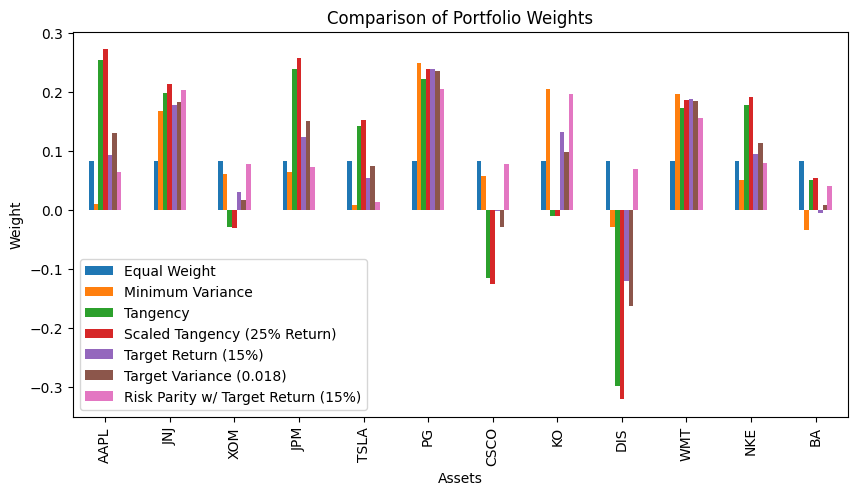

In [14]:
weights_df = pd.DataFrame({
    "Equal Weight": eq_wts,
    "Minimum Variance": mv_wts,
    "Tangency": tangency_wts,
    f"Scaled Tangency ({scaled_target_return * 100:.0f}% Return)": scaled_tangency_wts,
    f"Target Return ({target_return * 100:.0f}%)": target_ret_wts,
    f"Target Variance ({target_var:.3f})": tv_wts,
    f"Risk Parity w/ Target Return ({rp_target_return * 100:.0f}%)": rp_wts
})

weights_df.plot(kind="bar", figsize=(10, 5))
plt.title("Comparison of Portfolio Weights")
plt.ylabel("Weight")
plt.xlabel("Assets")
plt.show()

### 3.2 Plot of Cumulative Returns

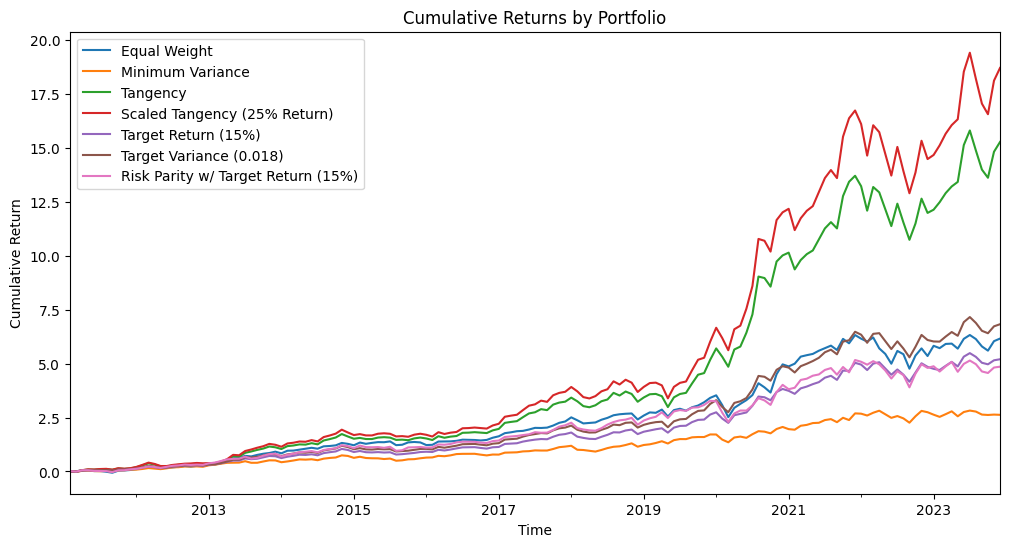

In [15]:
# calculate cumulative returns for each portfolio
cumulative_returns_df = pd.DataFrame({
    "Equal Weight": (1 + (excess_returns @ eq_wts)).cumprod() - 1,
    "Minimum Variance": (1 + (excess_returns @ mv_wts)).cumprod() - 1,
    "Tangency": (1 + (excess_returns @ tangency_wts)).cumprod() - 1,
    f"Scaled Tangency ({scaled_target_return * 100:.0f}% Return)": (1 + (excess_returns @ scaled_tangency_wts)).cumprod() - 1,
    f"Target Return ({target_return * 100:.0f}%)": (1 + (excess_returns @ target_ret_wts)).cumprod() - 1,
    f"Target Variance ({target_var:.3f})": (1 + (excess_returns @ tv_wts)).cumprod() - 1,
    f"Risk Parity w/ Target Return ({rp_target_return * 100:.0f}%)": (1 + (excess_returns @ rp_wts)).cumprod() - 1
})


# plot cumulative returns
cumulative_returns_df.plot(figsize=(12, 6))
plt.title("Cumulative Returns by Portfolio")
plt.ylabel("Cumulative Return")
plt.xlabel("Time")
plt.show()


### 3.3 Plot the Efficient Frontier Using Mean-Variance Optimization

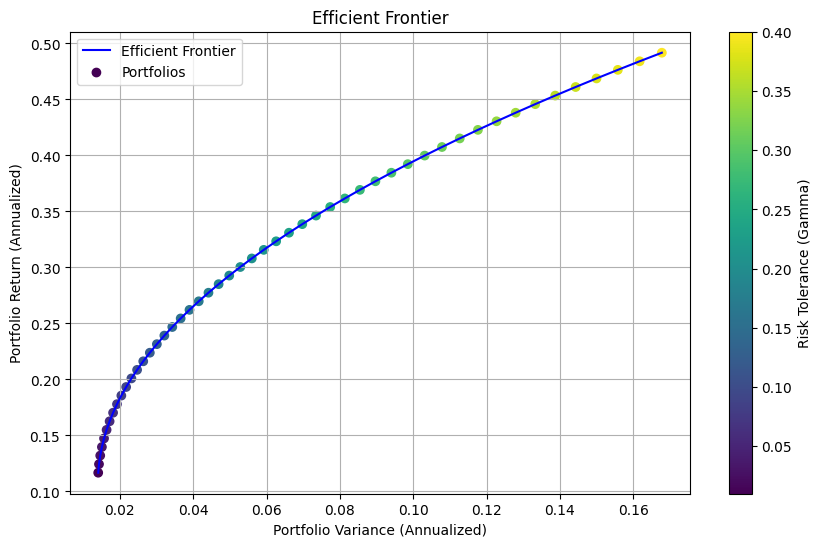

In [16]:
# define the range of risk tolerance parameters (gamma values)
risk_tolerance_values = np.linspace(0.01, 0.4, 50)

mean_returns = []
variances = []
# loop through each risk tolerance value and calculate portfolio weights
for gamma in risk_tolerance_values:
    weights = calc_mean_variance_weights(
        returns=excess_returns,
        risk_tolerance=gamma,
        periods_per_year=12
    )

    portfolio_return = (excess_returns @ weights).mean() * 12  # annualized mean return
    portfolio_variance = (excess_returns @ weights).var() * 12  # annualized variance

    mean_returns.append(portfolio_return)
    variances.append(portfolio_variance)

# plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.plot(variances, mean_returns, label="Efficient Frontier", color="blue")
plt.scatter(variances, mean_returns, c=risk_tolerance_values, cmap="viridis", label="Portfolios")
plt.colorbar(label="Risk Tolerance (Gamma)")
plt.title("Efficient Frontier")
plt.xlabel("Portfolio Variance (Annualized)")
plt.ylabel("Portfolio Return (Annualized)")
plt.legend()
plt.grid()
plt.show()


### 3.4 Plot the Efficient Frontier Using Target Return

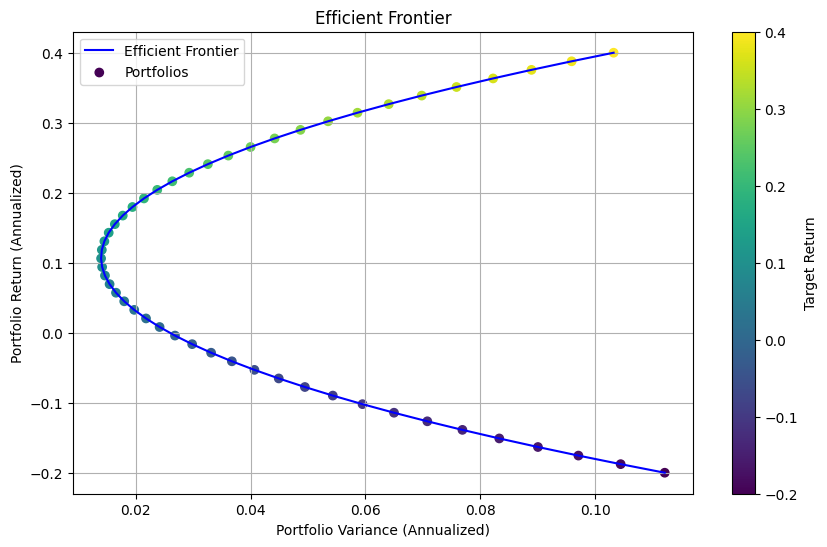

In [17]:
# define the range of target returns
target_returns = np.linspace(-0.2, 0.4, 50)  # Example: from -20% to +40% annualized return

mean_returns = []
variances = []
# loop through each target return and calculate portfolio weights
for target_return in target_returns:
    weights = calc_target_return_weights(
        returns=excess_returns,
        target_return=target_return,
        periods_per_year=12,
        strict_targets=True  # enforces equality constraints (==) for the targets in the objective, enabling negative target returns
    )
    
    portfolio_return = (excess_returns @ weights).mean() * 12  # annualized mean return
    portfolio_variance = (excess_returns @ weights).var() * 12  # annualized variance

    mean_returns.append(portfolio_return)
    variances.append(portfolio_variance)

# plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(variances, mean_returns, label="Efficient Frontier", color="blue")
plt.scatter(variances, mean_returns, c=target_returns, cmap="viridis", label="Portfolios")
plt.colorbar(label="Target Return")
plt.title("Efficient Frontier")
plt.xlabel("Portfolio Variance (Annualized)")
plt.ylabel("Portfolio Return (Annualized)")
plt.legend()
plt.grid()
plt.show()
